In [35]:
from scipy import stats 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import sklearn as sk
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.feature_selection import SelectFromModel

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'


In [2]:
df = pd.read_csv('bank-dataset.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [4]:
df.shape

(41188, 20)

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no missing continuous values in this data set. Thus, no imputation was necessary

In [7]:
bank_client = df.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,no,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


## Outlier Detection

In [8]:
bank_client['age'].describe()
#Calculating Quartiles and detecting Outliers
Q1=bank_client['age'].quantile(q = 0.25)
Q3=bank_client['age'].quantile(q = 0.75)

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [9]:
upper=Q3+1.5*(Q3-Q1)
lower=Q1-1.5*(Q3-Q1)

In [10]:
print('Ages above: ', upper , 'are outliers')
print('Ages below: ', lower , 'are outliers')
print('Numerber of outliers: ', bank_client[bank_client['age'] > 69.6]['age'].count())
print('Number of clients: ', len(bank_client))
#Outliers in %
print('Outliers are:', round(bank_client[bank_client['age'] > 69.6]['age'].count()*100/len(bank_client),2), '%')

Ages above:  69.5 are outliers
Ages below:  9.5 are outliers
Numerber of outliers:  469
Number of clients:  41188
Outliers are: 1.14 %


## Label Encoding for Bank-Client data - Categorical Variable

In [28]:
cat_vars=['job','marital','education','default','housing','loan']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(bank_client[var],prefix=var )
    data1=bank_client.join(cat_list)
    bank_client=data1
cat_vars=['job','marital','education','default','housing','loan']
data_vars=bank_client.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

ValueError: columns overlap but no suffix specified: Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed'],
      dtype='object')

In [29]:
bank_client_final=bank_client[to_keep]
bank_client_final.columns.values

array(['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_no', 'default_yes', 'housing_no', 'housing_yes',
       'loan_no', 'loan_yes'], dtype=object)

# Feature Engineering

In [23]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

In [24]:
bank_client_final['age'].nunique()

78

In [30]:
age(bank_client_final)

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,3,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
2,2,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,1,1,0
3,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,3,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,1,0
41184,2,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
41185,3,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,1,1,0
41186,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [33]:
bank_se = df.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [37]:
bank_se.corr()


,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
emp.var.rate,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,0.906970,0.522034,0.100513,0.945154,1.000000


In [38]:
def se(df):
    df.loc[df['emp.var.rate'] > 0.1, 'emp.var.rate'] = 3
    df.loc[df['emp.var.rate'] <= -1.8, 'emp.var.rate'] = 1
    df.loc[(df['emp.var.rate'] > -1.8) & (df['emp.var.rate'] <= 0.1)  , 'emp.var.rate']    = 2
    return df
se(bank_se)

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3.0,93.994,-36.4,4.857,5191.0
1,3.0,93.994,-36.4,4.857,5191.0
2,3.0,93.994,-36.4,4.857,5191.0
3,3.0,93.994,-36.4,4.857,5191.0
4,3.0,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...
41183,2.0,94.767,-50.8,1.028,4963.6
41184,2.0,94.767,-50.8,1.028,4963.6
41185,2.0,94.767,-50.8,1.028,4963.6
41186,2.0,94.767,-50.8,1.028,4963.6


In [39]:
bank_se['emp.var.rate'].value_counts()

3.0    23997
1.0    12090
2.0     5101
Name: emp.var.rate, dtype: int64

In [43]:
 def sse(df):
    df.loc[df['cons.conf.idx'] > (-36.4), 'cons.conf.idx'] = 3
    df.loc[df['cons.conf.idx'] <= (-46.2), 'cons.conf.idx'] = 1
    df.loc[(df['cons.conf.idx'] > (-46.2)) & (df['cons.conf.idx'] <= (-36.4))  , 'cons.conf.idx']    = 2
    return(df)
sse(bank_se).head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3.0,93.994,3.0,4.857,5191.0
1,3.0,93.994,3.0,4.857,5191.0
2,3.0,93.994,3.0,4.857,5191.0
3,3.0,93.994,3.0,4.857,5191.0
4,3.0,93.994,3.0,4.857,5191.0


In [47]:
def eub(df):
    df.loc[df['euribor3m']<1.3,'euribor3m']=1
    df.loc[(df['euribor3m']<4.19)&(df['euribor3m']>=1.3),'euribor3m']=2
    df.loc[(df['euribor3m']<4.96)&(df['euribor3m']>=4.19),'euribor3m']=3
    df.loc[(df['euribor3m']>=4.96)]=4
    return(df)
eub(bank_se).head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3.0,93.994,3.0,2.0,5191.0
1,3.0,93.994,3.0,2.0,5191.0
2,3.0,93.994,3.0,2.0,5191.0
3,3.0,93.994,3.0,2.0,5191.0
4,3.0,93.994,3.0,2.0,5191.0


In [48]:
bank_se['euribor3m'].value_counts()

2.0    32552
1.0     8636
Name: euribor3m, dtype: int64

In [50]:
def cci(df):
    df.loc[df['cons.price.idx']<93.06,'cons.price.idx']=1
    df.loc[(df['cons.price.idx']>93.06)& (df['cons.price.idx']<93.91),'cons.price.idx']=2
    df.loc[(df['cons.price.idx']>93.91),'cons.price.idx']=3
    return(df)
cci(bank_se).head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3.0,1.0,3.0,2.0,5191.0
1,3.0,1.0,3.0,2.0,5191.0
2,3.0,1.0,3.0,2.0,5191.0
3,3.0,1.0,3.0,2.0,5191.0
4,3.0,1.0,3.0,2.0,5191.0


In [52]:
def ne(df):
    df.loc[df['nr.employed']<5099.1,'nr.employed']=1
    df.loc[(df['nr.employed']>=5099.1)&(df['nr.employed']<5191.02)]=2
    df.loc[df['nr.employed']>=5191.02]=3
    return (df)
ne(bank_se).head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,2.0,2.0,2.0,2.0,1.0
1,2.0,2.0,2.0,2.0,1.0
2,2.0,2.0,2.0,2.0,1.0
3,2.0,2.0,2.0,2.0,1.0
4,2.0,2.0,2.0,2.0,1.0


In [54]:
#Other Attributes
bank_o = df.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [55]:
def pdays(df):
    df.loc[df['pdays']==999,'pdays_new']='never_contacted'
    df.loc[df['pdays']!=999,'pdays_new']='contacted_before'
    return (df)
pdays(bank_o)

,campaign,pdays,previous,poutcome,pdays_new
0,1,999,0,nonexistent,never_contacted
1,1,999,0,nonexistent,never_contacted
2,1,999,0,nonexistent,never_contacted
3,1,999,0,nonexistent,never_contacted
4,1,999,0,nonexistent,never_contacted
...,...,...,...,...,...
41183,1,999,0,nonexistent,never_contacted
41184,1,999,0,nonexistent,never_contacted
41185,2,999,0,nonexistent,never_contacted
41186,1,999,0,nonexistent,never_contacted


In [67]:
cat_vars=['pdays_new','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(bank_o[var], prefix=var)
    data1=bank_o.join(cat_list)
    bank_o=data1
cat_vars=['pdays_new','poutcome']
data_vars=bank_o.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

ValueError: columns overlap but no suffix specified: Index(['pdays_new_contacted_before', 'pdays_new_never_contacted'], dtype='object')

In [68]:
bank_o_final=bank_o[to_keep]
bank_o_final.columns.values

array(['campaign', 'pdays', 'previous', 'pdays_new_contacted_before',
       'pdays_new_never_contacted', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'], dtype=object)

In [69]:
bank_o_final.drop(['pdays'],axis=1,inplace=True)

In [74]:
bank_final= pd.concat([bank_client_final, bank_se, bank_o_final], axis = 1)
bank_final.head()

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,cons.conf.idx,euribor3m,nr.employed,campaign,previous,pdays_new_contacted_before,pdays_new_never_contacted,poutcome_failure,poutcome_nonexistent,poutcome_success
0,3,0,0,0,1,0,0,0,0,0,...,2.0,2.0,1.0,1,0,0,1,0,1,0
1,3,0,0,0,0,0,0,0,1,0,...,2.0,2.0,1.0,1,0,0,1,0,1,0
2,2,0,0,0,0,0,0,0,1,0,...,2.0,2.0,1.0,1,0,0,1,0,1,0
3,2,1,0,0,0,0,0,0,0,0,...,2.0,2.0,1.0,1,0,0,1,0,1,0
4,3,0,0,0,0,0,0,0,1,0,...,2.0,2.0,1.0,1,0,0,1,0,1,0


In [75]:
from sklearn.preprocessing import LabelEncoder
lbs=LabelEncoder()
df['y']=lbs.fit_transform(df['y'])

In [80]:
import statsmodels.api as sm
logit_model=sm.Logit(df['y'],bank_final[['age','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','campaign']])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.297141
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.156     
Dependent Variable: y                AIC:              24491.2571
Date:               2023-03-05 19:27 BIC:              24551.6384
No. Observations:   41188            Log-Likelihood:   -12239.   
Df Model:           6                LL-Null:          -14499.   
Df Residuals:       41181            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
age              -0.0209   0.0214  -0.9759 0.3291 -0.0629  0.0211
emp.var.rate      0.3120   0.0633   4.9288 0.0000  0.1879  0.4361


In [78]:
#importing necessary packages
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,BaggingRegressor,AdaBoostRegressor
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import cohen_kappa_score,make_scorer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix



In [81]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final, df.y, test_size = 0.2, random_state = 101)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [82]:

X_train.head()

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,cons.conf.idx,euribor3m,nr.employed,campaign,previous,pdays_new_contacted_before,pdays_new_never_contacted,poutcome_failure,poutcome_nonexistent,poutcome_success
39577,4,0,0,0,0,0,1,0,0,0,...,3.0,1.0,1.0,1,2,0,1,1,0,0
10104,3,0,0,0,0,0,0,0,0,0,...,3.0,3.0,1.0,1,0,0,1,0,1,0
17235,2,0,0,0,0,0,0,0,1,0,...,4.0,2.0,1.0,4,0,0,1,0,1,0
20926,1,1,0,0,0,0,0,0,0,0,...,4.0,2.0,1.0,1,0,0,1,0,1,0
17626,3,0,0,1,0,0,0,0,0,0,...,4.0,2.0,1.0,5,0,0,1,0,1,0


In [83]:
y_train.value_counts()

0    29269
1     3681
Name: y, dtype: int64

In [96]:
!pip install imbalanced-learn
!pip install -U imbalanced-learn


In [98]:
from imblearn.over_sampling import SMOTE

In [101]:
os = SMOTE(random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  58538
Number of no subscription in oversampled data 29269
Number of subscription 29269
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [102]:
X_train=os_data_X
y_train=os_data_y

# Logistic Regression

In [103]:

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(LOGCV)

LogisticRegression()

[[6772  507]
 [ 527  432]]
87.0
0.8358159750465379


# Decision Tree Classifier

In [104]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier() 
tree.fit(X_train,y_train)
treepred=tree.predict(X_test)

print(confusion_matrix(y_test, treepred))
print(round(accuracy_score(y_test, treepred),2)*100)
treeCV = (cross_val_score(tree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(treeCV)

DecisionTreeClassifier()

[[6206 1073]
 [ 606  353]]
80.0
0.8551027184585142


# Bagging 

In [105]:
param_tree={'criterion':['gini','entropy'],'max_depth':[3,5,7,9,11,13]}
best_tree=GridSearchCV(estimator=tree,param_grid=param_tree,scoring='accuracy',n_jobs=-1,cv=5)
best_tree.fit(X_train,y_train)
BesttreeCV = (cross_val_score(best_tree.best_estimator_, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(BesttreeCV)
bag=BaggingClassifier(base_estimator=best_tree.best_estimator_)
bagging_param={'n_estimators':[20,50,100,200]}
best_bag_tree=GridSearchCV(estimator=bag,param_grid=bagging_param,scoring='accuracy',cv=5,n_jobs=-1)
best_bag_tree.fit(X_train,y_train)
bagpred=best_bag_tree.predict(X_test)

print(confusion_matrix(y_test, bagpred))
print(round(accuracy_score(y_test, bagpred),2)*100)
BagtreeCV = (cross_val_score(best_bag_tree.best_estimator_, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(BagtreeCV)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 13]},
             scoring='accuracy')

0.7818510166894402


GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=13)),
             n_jobs=-1, param_grid={'n_estimators': [20, 50, 100, 200]},
             scoring='accuracy')

[[6365  914]
 [ 478  481]]
83.0
0.8162900701627874


# Random Forest Classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_validate(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = {'accuracy','f1'}))
print(RFCCV)

RandomForestClassifier(n_estimators=200)

[[6275 1004]
 [ 579  380]]
81.0
{'fit_time': array([ 9.60056782,  9.01187849,  9.67090321,  9.32748008, 10.3647778 ,
       10.46356559, 11.80926585,  9.56536746, 10.67868423, 12.08977675]), 'score_time': array([0.29680347, 0.31365228, 0.31242275, 0.34370565, 0.31243181,
       0.29684162, 0.31242752, 0.37672806, 0.31242585, 0.34366846]), 'test_f1': array([0.87051071, 0.86334654, 0.86151203, 0.85904437, 0.86064319,
       0.86618414, 0.85948999, 0.86579213, 0.86618754, 0.86426875]), 'test_accuracy': array([0.86573283, 0.86453707, 0.86231636, 0.8588999 , 0.86009566,
       0.86419542, 0.85975401, 0.86368295, 0.8663933 , 0.86331796])}


# AdaBoosting Tree Classifier

In [107]:
adb=AdaBoostClassifier()
adb.fit(X_train, y_train)
adbprd = adb.predict(X_test)

print(confusion_matrix(y_test, adbprd ))
print(round(accuracy_score(y_test, adbprd),2)*100)
ADB = (cross_val_score(estimator = adb, X = X_train, y = y_train, cv = 10,scoring='accuracy').mean())
print(ADB)

AdaBoostClassifier()

[[6476  803]
 [ 467  492]]
85.0
0.7836451815639645


# Xgboost Classifier

In [110]:
!pip install xgboost

In [111]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10,scoring='accuracy').mean())
print(XGB)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

[[6650  629]
 [ 543  416]]
86.0
0.8508841429975756


Text(0.5, 1.0, 'Receiver Operating Characteristic Logistic ')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic Bagging-Tree ')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic Random Forest ')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

Text(0.5, 1.0, 'Reciever Operating Characterstic XGBoost')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

Text(0.5, 1.0, 'Reciever Operating Characterstic AdaBoost')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Comparison ')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

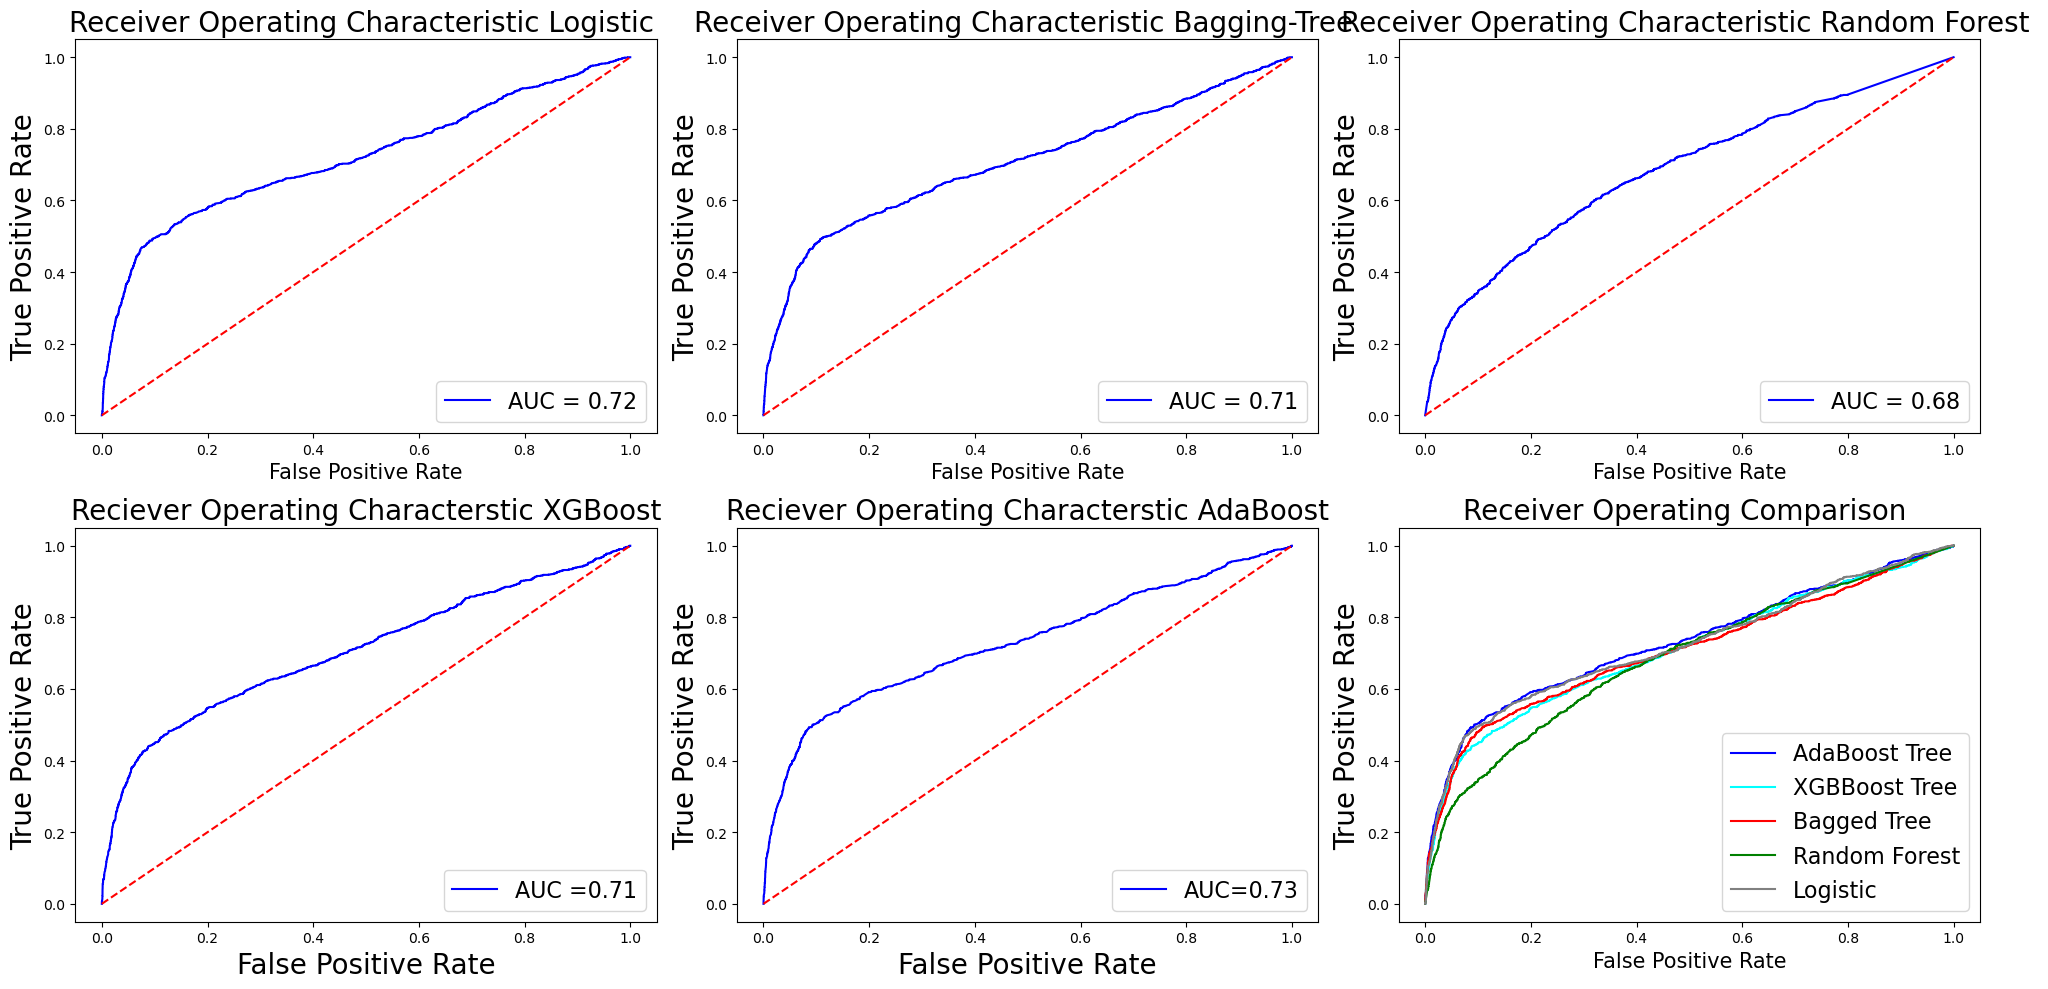

In [112]:
from sklearn import metrics
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10))

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})
#Bagging Model
probs = best_bag_tree.predict_proba(X_test)
preds = probs[:,1]
fprbg, tprbg, thresholdbg = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprbg, tprbg)

ax_arr[0,1].plot(fprbg, tprbg, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Bagging-Tree ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})



#RANDOM FOREST 
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,2].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#XGBoost
probs=xgb.predict_proba(X_test)
preds=probs[:,1]
fprxgb,tprxgb,thresholdxgb=metrics.roc_curve(y_test,preds)
roc_aucxgb=metrics.auc(fprxgb,tprxgb)

ax_arr[1,0].plot(fprxgb,tprxgb,'b',label='AUC =%0.2f' % roc_aucxgb)
ax_arr[1,0].plot([0,1],[0,1],'r--')
ax_arr[1,0].set_title("Reciever Operating Characterstic XGBoost", fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel("False Positive Rate", fontsize=20)
ax_arr[1,0].legend(loc="lower right",prop={'size' :16})


#Adaptive Boosting
probs=adb.predict_proba(X_test)
preds=probs[:,1]
fpradb,tpradb,thresholdadb=metrics.roc_curve(y_test,preds)
roc_aucadb=metrics.auc(fpradb,tpradb)

ax_arr[1,1].plot(fpradb,tpradb,'b',label='AUC=%0.2f' % roc_aucadb)
ax_arr[1,1].plot([0,1],[0,1],'r--')
ax_arr[1,1].set_title('Reciever Operating Characterstic AdaBoost',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=20)
ax_arr[1,1].legend(loc='lower right',prop={'size':16})


#Combining All 
ax_arr[1,2].plot(fpradb,tpradb,'b',label="AdaBoost Tree",color='blue')
ax_arr[1,2].plot(fprxgb,tprxgb,'b',label="XGBBoost Tree",color='cyan')
ax_arr[1,2].plot(fprbg,tprbg,'b',label="Bagged Tree",color='red')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

So now we have to decide which one is the best model, and we have two types of false values:

False Positive, means the client do NOT SUBSCRIBED to term deposit, but the model thinks he did. False Negative, means the client SUBSCRIBED to term deposit, but the model said he dont. In my opinion:

The first one is most harmful, because we think that we already have that client but we dont and maybe we lost him in other future campaings The second its not good but its ok, we have that client and in the future we'll discovery that in truth he's already our client So, our objective here, is to find the best model by confusion matrix with the lowest False Positive as possible.

In [117]:
from sklearn.metrics import classification_report

print('Logistic Regression Reports\n',classification_report(y_test, logpred))

      

Logistic Regression Reports
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7279
           1       0.46      0.45      0.46       959

    accuracy                           0.87      8238
   macro avg       0.69      0.69      0.69      8238
weighted avg       0.87      0.87      0.87      8238



In [120]:
print(f'Bagging Report\n',classification_report(y_test,bagpred))


Bagging Report
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      7279
           1       0.34      0.50      0.41       959

    accuracy                           0.83      8238
   macro avg       0.64      0.69      0.66      8238
weighted avg       0.86      0.83      0.84      8238



In [121]:
print('RandomForest Reports\n',classification_report(y_test, rfcpred))


RandomForest Reports
               precision    recall  f1-score   support

           0       0.92      0.86      0.89      7279
           1       0.27      0.40      0.32       959

    accuracy                           0.81      8238
   macro avg       0.60      0.63      0.61      8238
weighted avg       0.84      0.81      0.82      8238



In [122]:
print('AdaBoost Reports\n',classification_report(y_test, adbprd))


AdaBoost Reports
               precision    recall  f1-score   support

           0       0.93      0.89      0.91      7279
           1       0.38      0.51      0.44       959

    accuracy                           0.85      8238
   macro avg       0.66      0.70      0.67      8238
weighted avg       0.87      0.85      0.86      8238



In [123]:
print('XGBoost Reports\n',classification_report(y_test, xgbprd))

XGBoost Reports
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      7279
           1       0.40      0.43      0.42       959

    accuracy                           0.86      8238
   macro avg       0.66      0.67      0.67      8238
weighted avg       0.86      0.86      0.86      8238

